In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import pandas_profiling

In [5]:
df =pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Robot%20Execution%20Failures%20Data%20Set/Robot_Failures%20LP1_Grasp_position.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
0,-1,-1,63,-3,-1,0,0,0,62,-3,...,-3,0,0,-1,0,64,-2,-1,0,3
1,-1,-1,63,-2,-1,0,-1,-1,63,-3,...,-6,-3,-1,-1,-1,59,-3,-4,0,3
2,-1,0,57,-5,-3,0,0,-3,63,-1,...,-6,-2,-1,-1,0,54,-4,-3,0,3
3,0,-1,59,-2,-1,-1,0,-3,61,-1,...,-4,0,0,-1,1,63,-8,-2,0,3
4,0,-2,65,-4,-2,0,-1,-2,56,-5,...,-8,-4,-1,-1,1,57,-9,-4,-1,3


In [6]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
83,-29,-10,-208,180,12,-11,-29,-4,-246,192,...,396,101,-23,-105,63,-912,394,100,-25,4
84,4,6,50,-25,1,0,4,8,44,-26,...,-46,14,-7,19,14,2,-42,10,-7,2
85,21,15,-14,-46,16,-7,23,18,-27,-49,...,-88,154,4,148,69,-411,-95,191,8,4
86,171,86,-486,-113,222,13,198,96,-566,-125,...,-118,466,44,342,154,-1036,-118,466,44,4
87,-6,3,52,-15,-17,3,-7,2,52,-17,...,-29,-27,5,-13,2,15,-25,-25,6,2


In [7]:
df.isna().describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
count,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88


In [8]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V87      0
V88      0
V89      0
V90      0
Class    0
Length: 91, dtype: int64

In [9]:
df.isna().count()

V1       88
V2       88
V3       88
V4       88
V5       88
         ..
V87      88
V88      88
V89      88
V90      88
Class    88
Length: 91, dtype: int64

In [10]:
x = df.drop('Class',axis=1)
y = df['Class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [13]:
x_train.shape,y_train.shape

((66, 90), (66,))

In [14]:
x.shape,y.shape

((88, 90), (88,))

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dnt = DecisionTreeClassifier()

In [17]:
dnt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dnt_pred = dnt.predict(x_test)
dnt_pred

array([1, 3, 2, 1, 4, 4, 4, 4, 3, 3, 4, 2, 4, 3, 4, 3, 1, 3, 4, 2, 4, 4],
      dtype=int64)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
cm = confusion_matrix(y_test,dnt_pred)

In [21]:
import matplotlib.pyplot as plt

In [22]:
print(classification_report(y_test,dnt_pred))

              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.67      0.50      0.57         4
           3       0.67      0.80      0.73         5
           4       0.70      0.78      0.74         9

    accuracy                           0.64        22
   macro avg       0.59      0.58      0.58        22
weighted avg       0.62      0.64      0.62        22



In [23]:
imp = dnt.feature_importances_

feature : 0, score : 0.03929
feature : 1, score : 0.00000
feature : 2, score : 0.00000
feature : 3, score : 0.00000
feature : 4, score : 0.00000
feature : 5, score : 0.00000
feature : 6, score : 0.00000
feature : 7, score : 0.00000
feature : 8, score : 0.09638
feature : 9, score : 0.00000
feature : 10, score : 0.16281
feature : 11, score : 0.00000
feature : 12, score : 0.00000
feature : 13, score : 0.00000
feature : 14, score : 0.36249
feature : 15, score : 0.00000
feature : 16, score : 0.00000
feature : 17, score : 0.00000
feature : 18, score : 0.00000
feature : 19, score : 0.00000
feature : 20, score : 0.00000
feature : 21, score : 0.00000
feature : 22, score : 0.00000
feature : 23, score : 0.00000
feature : 24, score : 0.00000
feature : 25, score : 0.00000
feature : 26, score : 0.01743
feature : 27, score : 0.00000
feature : 28, score : 0.00000
feature : 29, score : 0.00000
feature : 30, score : 0.00000
feature : 31, score : 0.00000
feature : 32, score : 0.00000
feature : 33, score 

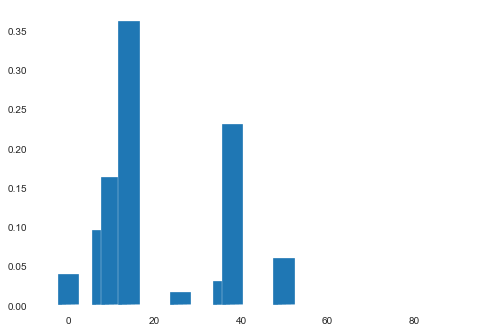

In [24]:
for i,v in enumerate(imp):
    print("feature : %.d, score : %.5f" % (i,v))
plt.bar([x for x in range(len(imp))],imp,width=5)
plt.show()

In [25]:
from sklearn import tree

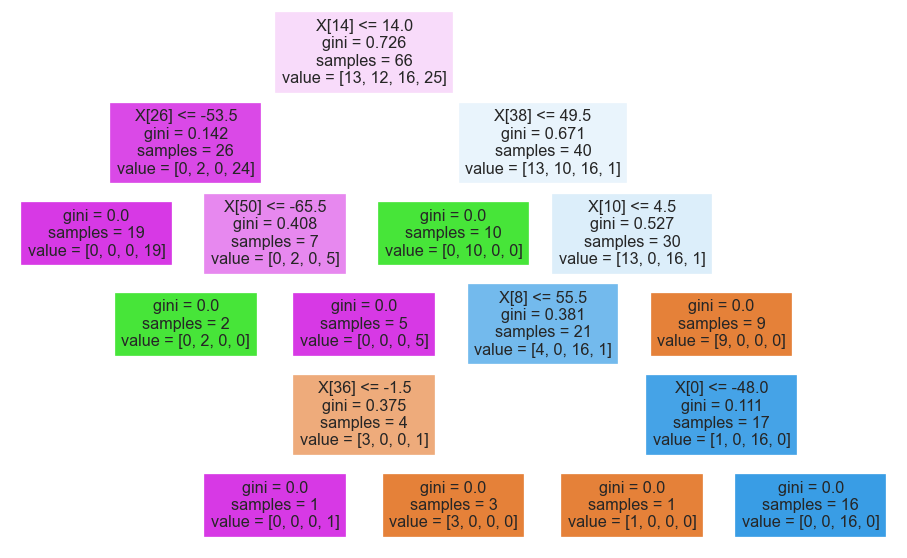

In [26]:
plt.figure(figsize=(16,10))
tree.plot_tree(dnt,filled=True)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
r = RandomForestClassifier()

In [29]:
r.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
r_pred= r.predict(x_test)

In [31]:
cm=  confusion_matrix(y_test,r_pred)

In [32]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       0.67      0.50      0.57         4
           3       1.00      1.00      1.00         5
           4       0.75      0.67      0.71         9

    accuracy                           0.77        22
   macro avg       0.77      0.79      0.77        22
weighted avg       0.78      0.77      0.77        22



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(max_iter=1000)

In [35]:
lr.fit(x_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lr_pred  = lr.predict(x_test)

In [37]:
cm = confusion_matrix(y_test,lr_pred)

In [38]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.75      0.75      0.75         4
           3       0.56      1.00      0.71         5
           4       0.86      0.67      0.75         9

    accuracy                           0.64        22
   macro avg       0.54      0.60      0.55        22
weighted avg       0.61      0.64      0.61        22



In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
k = KNeighborsClassifier()

In [41]:
k.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
k_pred = k.predict(x_test)

In [43]:
cm = confusion_matrix(y_test,k_pred)

In [44]:
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.75      0.75      0.75         4
           3       0.83      1.00      0.91         5
           4       0.89      0.89      0.89         9

    accuracy                           0.86        22
   macro avg       0.87      0.85      0.85        22
weighted avg       0.87      0.86      0.86        22



In [46]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
pd.DataFrame({'Decission tree': [accuracy_score(y_test,dnt_pred)],
              'knn classifier': [accuracy_score(y_test,k_pred)],
             'logistic regressor': [accuracy_score(y_test,lr_pred)],
             'random forest': [accuracy_score(y_test,r_pred)]},index=['Accuracy_Score'])*100

,Decission tree,knn classifier,logistic regressor,random forest
Accuracy_Score,63.636364,86.363636,63.636364,77.272727


In [47]:
precision_score(y_test,dnt_pred,average=None)

array([0.33333333, 0.66666667, 0.66666667, 0.7       ])

## Bagging 
    Bagging = Bootstrap + Aggregation

In [48]:
%matplotlib inline

In [49]:
import itertools
import matplotlib.gridspec as gridspec
from sklearn import datasets

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [51]:
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [52]:
np.random.seed(0)

In [53]:
iris = datasets.load_iris()
X,y = iris.data[:,0:2],iris.target

In [54]:
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression(max_iter=1000)

bagging1 = BaggingClassifier(base_estimator=clf1,n_estimators=10,max_samples=0.8,max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2,n_estimators=10,max_samples=0.8,max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf3,n_estimators=10,max_samples=0.8,max_features=0.8)

Accuracy: 0.63 (+/- 0.02) [Decision tree]
Accuracy: 0.70 (+/- 0.02) [K-nn]
Accuracy: 0.67 (+/- 0.07) [Bagging Tree]
Accuracy: 0.68 (+/- 0.06) [Bagging K-NN]


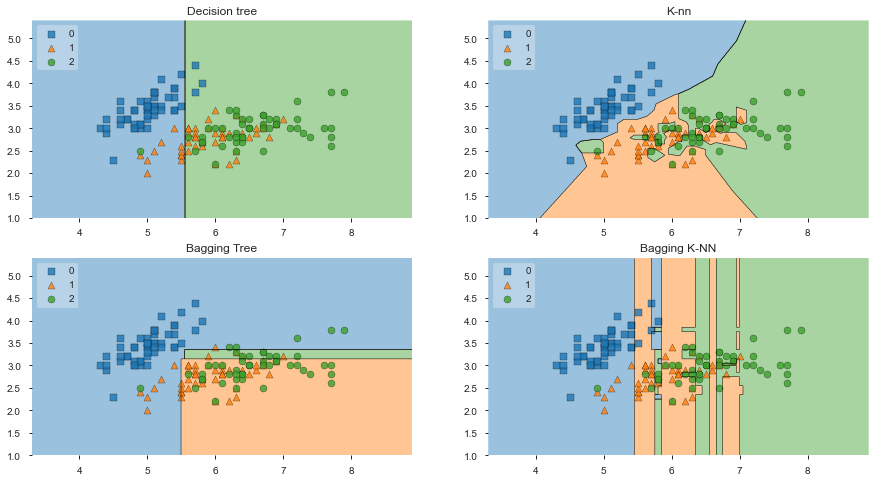

In [55]:
label = ['Decision tree','K-nn','Bagging Tree','Bagging K-NN']
clf_list = [clf1,clf2,bagging1,bagging2]

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list,label,grid):
    scores= cross_val_score(clf,X,y,cv=3,scoring = 'accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(),label))
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X=X,y=y,clf=clf, legend=2)
    plt.title(label)
plt.show()

Accuracy: 0.82 (+/- 0.02) [Logistic Regression]
Accuracy: 0.81 (+/- 0.02) [Bagging Logistic]


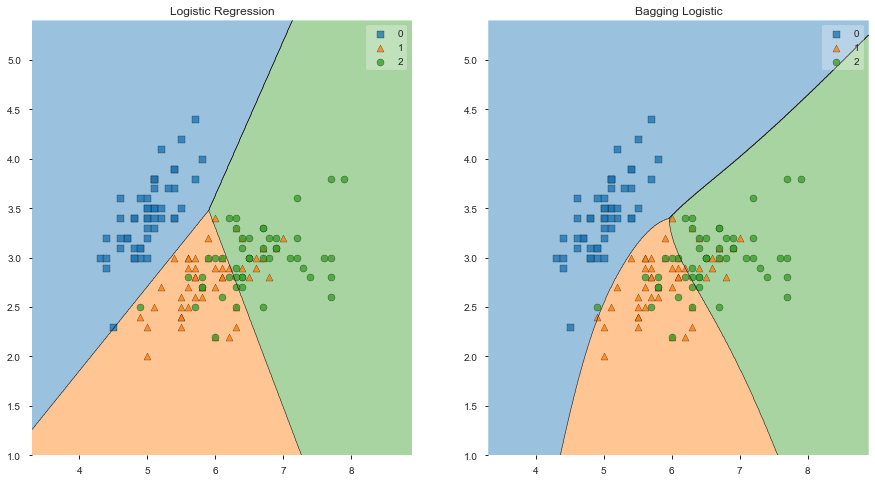

In [138]:
label = ['Logistic Regression','Bagging Logistic']
clf_list = [clf3,bagging3]

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(1,2)
grid = itertools.product([0,1],repeat=1)

for clf, label, grd in zip(clf_list,label,grid):
    scores= cross_val_score(clf,X,y,cv=2,scoring = 'accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(),label))
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0]])
    fig = plot_decision_regions(X=X,y=y,clf=clf, legend=1)
    plt.title(label)
plt.show()

In [139]:
label = ['Decision tree','K-nn','Logistic Regression','Bagging Tree','Bagging K-NN','Bagging Logistic']
clf_list = [clf1,clf2,clf3,bagging1,bagging2,bagging3]

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(3,2)
grid = itertools.product([0,1],repeat=3)

for clf, label, grd in zip(clf_list,label,grid):
    scores= cross_val_score(clf,X,y,cv=2,scoring = 'accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(),label))
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1],grd[2]])
    fig = plot_decision_regions(X=X,y=y,clf=clf, legend=1)
    plt.title(label)
plt.show()

Accuracy: 0.63 (+/- 0.01) [Decision tree]


ValueError: unrecognized subplot spec

<Figure size 1080x576 with 0 Axes>

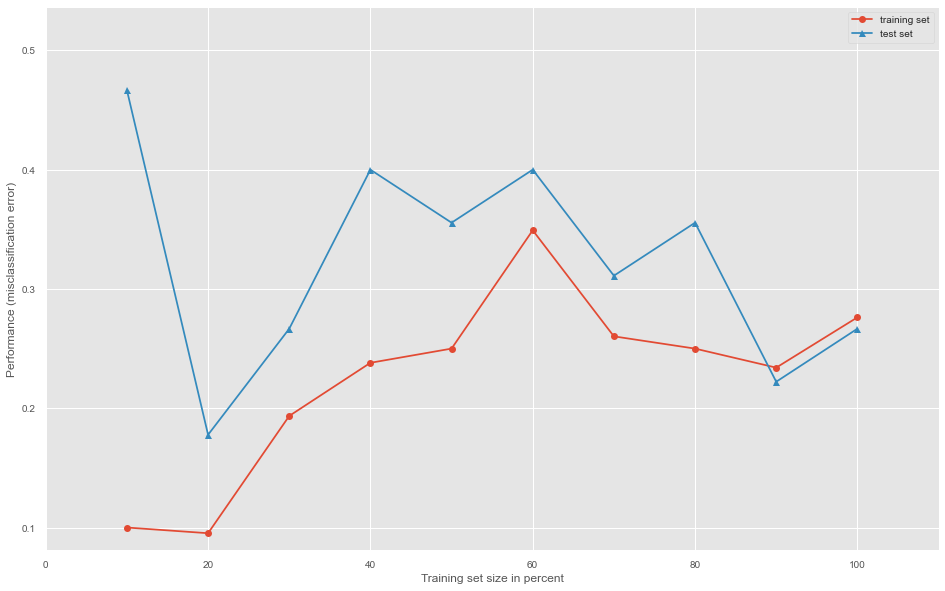

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

plt.figure(figsize=(16,10))
plot_learning_curves(x_train,y_train,x_test,y_test,bagging1, print_model=False, style='ggplot')
plt.show()

# The figure shows learning curves for the bagging tree ensemble we can see an average error is 0.3

In [57]:
# Ensemble size
num_est = list(map(int,np.linspace(1,100,20)))
bg_clf_cv_mean = []
bg_clf_cv_std= []

for n_est in num_est:
    bg_clf = BaggingClassifier(base_estimator=clf1,n_estimators=n_est,max_samples=0.8,max_features=0.8)
    scores = cross_val_score(bg_clf,X,y,cv=3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

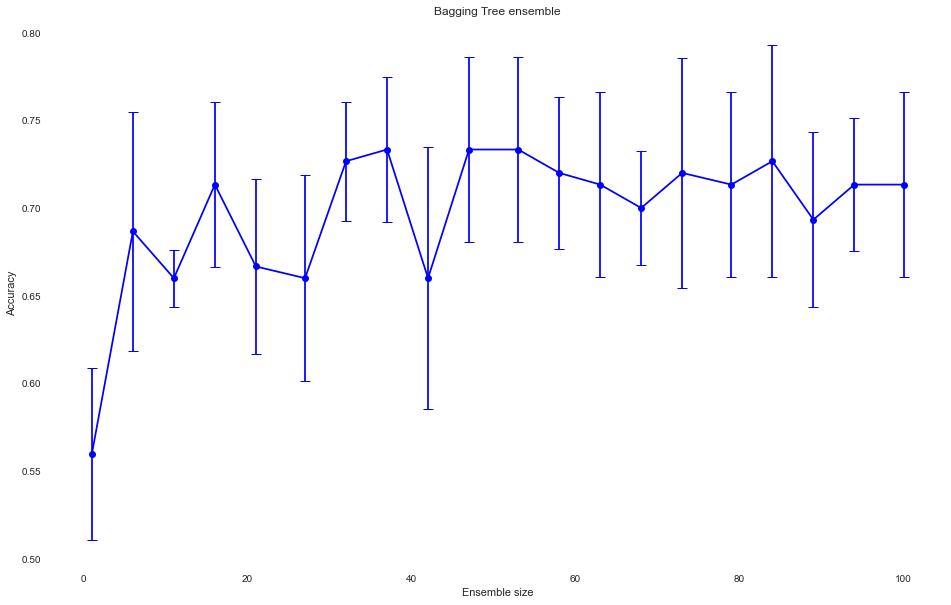

In [58]:
plt.figure(figsize=(16,10))
(D1, caps, D2) = plt.errorbar(num_est, bg_clf_cv_mean, yerr= bg_clf_cv_std, c= 'blue',fmt = '-o',capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.ylabel('Accuracy');plt.xlabel('Ensemble size'); plt.title('Bagging Tree ensemble');
plt.show()

In [59]:
from sklearn.ensemble import AdaBoostClassifier # for voting process

In [60]:
iris = datasets.load_iris()
X, y = iris.data[:,0:2],iris.target

#XOR dataset

#X = np.random.radn(200, 2)
#y = np.array(map(int,np.logical_xor(x[:,0]> 0 ,X [:,1] > 0)))

clf = DecisionTreeClassifier(criterion='entropy',max_depth=1)

num_est = [1,2,3,10]
label = ['AdaBoost (n_est= 1)','AdaBoost (n_est= 2)','AdaBoost (n_est= 3)','AdaBoost (n_est= 10)']

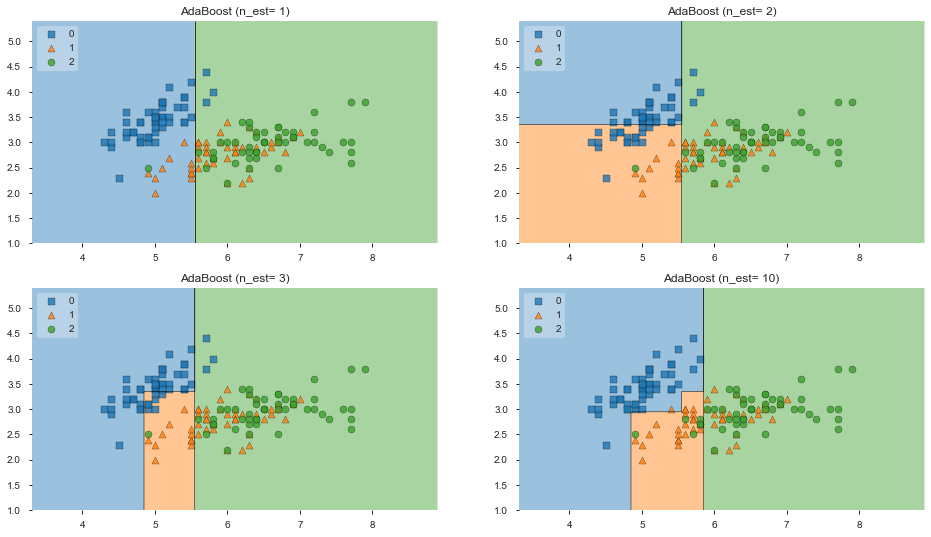

In [61]:
fig = plt.figure(figsize=(16,9))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):
    boosting =  AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y ,clf=boosting, legend=2)
    plt.title(label)
    
plt.show()

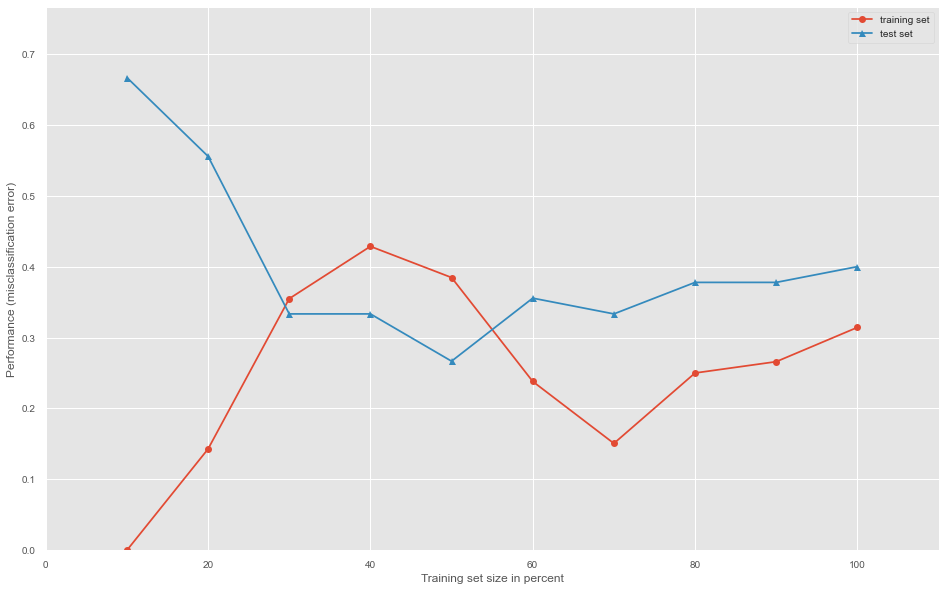

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)

plt.figure(figsize=(16,10))
plot_learning_curves(x_train,y_train,x_test,y_test,boosting, print_model=False, style='ggplot')
plt.show()

In [63]:
# Ensemble size
num_est = list(map(int,np.linspace(1,100,20)))
bg_clf_cv_mean = []
bg_clf_cv_std= []

for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf,n_estimators=n_est)
    scores = cross_val_score(ada_clf,X,y,cv=3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

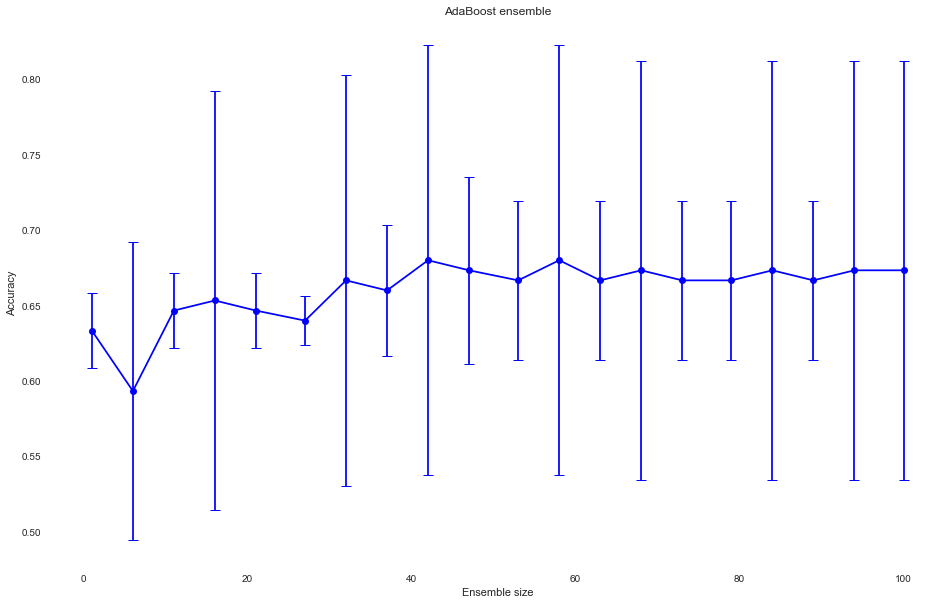

In [64]:
plt.figure(figsize=(16,10))
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr= bg_clf_cv_std, c= 'blue',fmt = '-o',capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.ylabel('Accuracy');plt.xlabel('Ensemble size'); plt.title('AdaBoost ensemble');
plt.show()

# Stacking

In [66]:
from sklearn.datasets import load_iris
iris =load_iris()
X, y = iris.data[:,1:3], iris.target

In [67]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
lr = LogisticRegression()
from sklearn.ensemble import StackingClassifier
sclf = StackingClassifier([clf1, clf2,clf3])

Accuracy: 0.91 (+/- 0.01) [K-nn]
Accuracy: 0.95 (+/- 0.01) [Random forest]
Accuracy: 0.91 (+/- 0.02) [Navie Bayes]
Accuracy: nan (+/- nan) [stacking classifier]


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: zip argument #1 must support iteration

  FitFailedWarning)


TypeError: zip argument #1 must support iteration

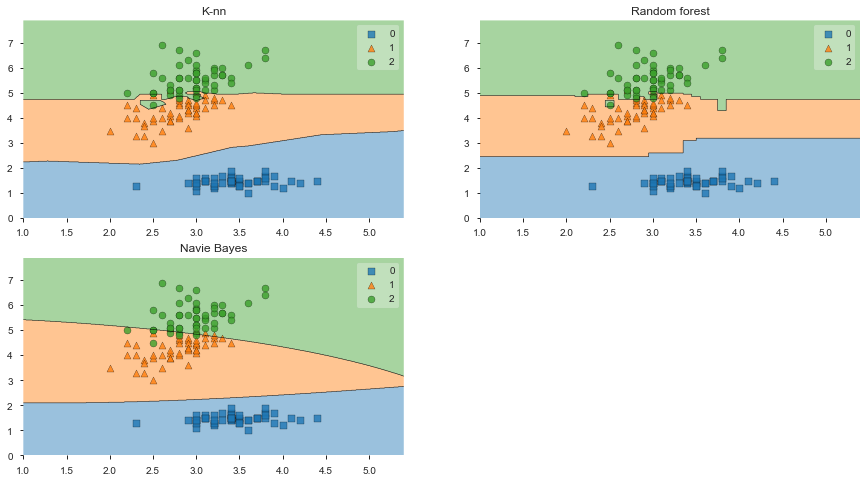

In [68]:
label = ['K-nn','Random forest','Navie Bayes','stacking classifier']
clf_list = [clf1,clf2,clf3,sclf]

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label,grd in zip(clf_list,label,grid):
    scores= cross_val_score(clf,X,y,cv=3,scoring = 'accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(),label))
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=1)
    plt.title(label)
    
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

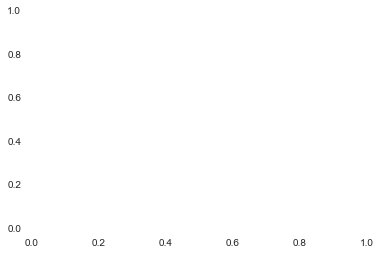

In [74]:
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4),clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(16,10))
plot_learning_curves(X_train,y_train,X_test,y_test,sclf, print_model=False, style='ggplot')
plt.show()

TypeError: zip argument #1 must support iteration

<Figure size 1152x720 with 0 Axes>